<div>
<img src="https://nci.org.au/sites/default/files/logos/Logo-NCI.svg" width="300" align="left"/>
</div>

## Requesting ASTER data subsets through NCI's GSKY Data Server
NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Coverage Service (WCS), which is a standard protocol for serving geospatial data in common formats such as NetCDF and GeoTIFF.  

**Constructing WCS Requests**

GSKY's Web Coverage Service (WCS) allows users to request data or subsets of data in either NetCDF3 or GeoTIFF format. The request is made by constructing a **GetCoverage** URL, which is then used within a web browser to communicate to the GSKY Data Server. 

For example, the GetCoverage request for the aster layer takes the following form:

`http://gsky.nci.org.au/ows/aster`?
<br>
`service =` WCS
<br>
`&version =` 1.0.0
<br>
`&request =` GetCoverage
<br>
`&coverage =` value 
<br>
`&format =` value
<br>
`&bbox =`value
<br>
`&time =`value
<br>
`&crs =`value
<br>

**GetCoverage parameters:**

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WCS                                                          |
|version      |     Required        |  `1.0.0`                                                          |
|request      |     Required        | `GetCoverage`                                                     |
|coverage     |     Required        | `<variable>`                                                      |
|format       |     Required        | `GeoTIFF  `, `GeoTIFF_Float  `, `NetCDF3  `                       |
|bbox`*`         |     Required/Optional        | `<xmin,ymin,xmax,ymax>`                                           |
|time`*`         |     Required/Optional        | `<time_value>`                                                    |
|srs, or crs  |     Optional        | `<srs_value>` or `<crs_value>`                                    |

`*`For large files and/or files with a time dimension, these might be necessary. If `bbox` is not defined the entire spatial domain will be returned (if server limits allow) and if `time` is not specified, either the first or sometimes last timestep is returned. 

**WCS GetCapabilities and DescribeCoverage**

In order to construct the **GetCoverage** URL, a **GetCapabilities** request can be made to the server. This request returns an xml describing the available WCS parameters (metadata, services, and data) made available by NCI's GSKY server. Additional metadata information can also be requested about a specific coverage layer by making a **DescribeCoverage** request. 

**GetCapabilities example:**

> [http://gsky.nci.org.au/ows/aster?service=WCS&version=1.0.0&request=GetCapabilities<br/>](http://gsky.nci.org.au/ows/aster?service=WCS&version=1.0.0&request=GetCapabilities)


**DescribeCoverage example:**

> [http://gsky.nci.org.au/ows/aster?service=WCS&version=1.0.0&coverage=Ferric_Oxide_Content&request=DescribeCoverage<br/>](http://gsky.nci.org.au/ows/aster?service=WCS&version=1.0.0&coverage=Ferric_Oxide_Content&request=DescribeCoverage)


<br>

**GetCoverage Request**

Using the information returned from the GetCapabilities and DescribeCoverage requests, a GetMap URL can be constructed and then entered into the address bar of any web browser.  

**Example GetCoverage (NetCDF format)**:

> [http://gsky.nci.org.au/ows/aster?<br/>
service=WCS&<br/>
coverage=Ferrous_Iron_Index&<br/>
service=WCS&<br/>
crs=EPSG:4326&<br/>
format=NetCDF&<br/>
request=GetCoverage&<br/>
height=256&<br/>
width=256&<br/>
version=1.0.0&<br/>
bbox=148,-37,151,-34&<br/>
time=2012-06-01T00:00:000Z<br/>
](http://gsky.nci.org.au/ows/aster?SERVICE=WCS&service=WCS&crs=EPSG:4326&format=NetCDF&request=GetCoverage&height=256&width=256&version=1.0.0&bbox=148,-37,151,-34&coverage=Ferrous_Iron_Index&time=2012-06-01T00:00:00.000Z)


**Example GetCoverage (GeoTIFF format):**

> [http://gsky.nci.org.au/ows/aster?<br/>
service=WCS&<br/>
coverage=Ferrous_Iron_Index&<br/>
service=WCS&<br/>
crs=EPSG:4326&<br/>
format=GeoTIFF&<br/>
request=GetCoverage&<br/>
height=256&<br/>
width=256&<br/>
version=1.0.0&<br/>
bbox=148,-37,151,-34&<br/>
time=2012-06-01T00:00:000Z<br/>
](http://gsky.nci.org.au/ows/aster?SERVICE=WCS&service=WCS&crs=EPSG:4326&format=GeoTIFF&request=GetCoverage&height=256&width=256&version=1.0.0&bbox=148,-37,151,-34&coverage=Ferrous_Iron_Index&time=2012-06-01T00:00:000Z)

<br></br>

### Using GSKY's WCS in Python

Many tools are available to perform the above steps less manually. In particular, Python's OWSLib library can be used with GSKY's WCS. 

**The following libraries will need to be imported for the below example** 

In [1]:
from owslib.wcs import WebCoverageService
from PIL import Image
%matplotlib inline

**To start, we will need the base GSKY server URL:**

In [2]:
gsky_url = 'http://gsky.nci.org.au/ows/aster'

**Now using OWSLib, you can begin by inspecting the service metadata:**

In [3]:
wcs = WebCoverageService(gsky_url)

**Find out the available data layers that can be requested:**

In [4]:
for layer in list(wcs.contents):
    print("Layer Name:", layer)
    print("Title:", wcs[layer].title, '\n')

Layer Name: AlOH_Group_Composition
Title: ASTER Map AlOH Group Composition 

Layer Name: AlOH_Group_Content
Title: ASTER Map AlOH Group Content 

Layer Name: FeOH_Group_Content
Title: ASTER Map FeOH Group Content 

Layer Name: Ferric_Oxide_Composition
Title: ASTER Map Ferric Oxide Composition 

Layer Name: Ferric_Oxide_Content
Title: ASTER Map Ferric Oxide Content 

Layer Name: Ferrous_Iron_in_MgOH
Title: ASTER Map Ferrous Iron Content in MgOH/carbonate 

Layer Name: Ferrous_Iron_Index
Title: ASTER Map Ferrous Iron Index 

Layer Name: Green_Vegetation_Content
Title: ASTER Map Green Vegetation Content 

Layer Name: Kaolin_Group_Index
Title: ASTER Map Kaolin Group Index 

Layer Name: MgOH_Group_Composition
Title: ASTER Map MgOH Group Composition 

Layer Name: MgOH_Group_Content
Title: ASTER Map MgOH Group Content 

Layer Name: Opaque_Index
Title: ASTER Map Opaque Index 

Layer Name: Quartz_Index
Title: ASTER Map TIR Quartz Index 

Layer Name: Silica_Index
Title: ASTER Map TIR Silica Inde

**We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer** 

In [5]:
layer = "Silica_Index"

In [6]:
print(wcs[layer].abstract)

1. Band ratio: B13/B10 Blue is low silica content Red is high silica content (potentially includes Si-rich minerals, such as quartz, feldspars, Al-clays)

Geoscience Applications: Broadly equates to the silica content though the intensity (depth) of this reststrahlen feature is also affected by particle size less than 250 micron. Useful product for mapping: (1) colluvial/alluvial materials; (2) silica-rich (quartz) sediments (e.g. quartzites); (3) silification and silcretes; and (4) quartz veins. Use in combination with quartz index, which is often correlated with the Silica index.

NCI Data Catalogue: http://dx.doi.org/10.25914/5f224f299e246


**Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request)** 

In [7]:
print("CRS Options: ")
crs = wcs[layer].supportedCRS
print('\t', crs, '\n')
    
print("Bounding Box: ")
bbox = wcs[layer].boundingBoxWGS84
print('\t', bbox, '\n')
    
print("Time Positions: ")
time = wcs[layer].timepositions
print('\t', time[:10], '\n')

CRS Options: 
	 [urn:ogc:def:crs:EPSG::4326] 

Bounding Box: 
	 (-180.0, -90.0, 180.0, 90.0) 

Time Positions: 
	 ['2012-06-01T00:00:00.000Z'] 



**Now let's use the information above to construct and make GetCoverage requests**

The below sections will demonstrate both a request in GeoTIFF and NetCDF formats.

**We'll need to define a bounding box for our request:**

In [8]:
subset_bbox = (113, -44, 153, -11)

**OWSLib's library can now be used to make the GetCoverage request:**

In [9]:
output = wcs.getCoverage(identifier=layer, 
                         time=[wcs[layer].timepositions[0]],
                         bbox=subset_bbox,format='GeoTIFF',
                         crs='EPSG:4326', width=256, height=256)

**To view the above constructed URL:**

In [10]:
print(output.geturl())

http://gsky.nci.org.au/ows/aster?version=1.0.0&request=GetCoverage&service=WCS&Coverage=Silica_Index&BBox=113%2C-44%2C153%2C-11&time=2012-06-01T00%3A00%3A00.000Z&crs=EPSG%3A4326&format=GeoTIFF&width=256&height=256


**Write the result to a file:**

In [11]:
filename = './gsky_wcs.tiff'
with open(filename, 'wb') as f:
    f.write(output.read())

**And if we'd like to confirm the result, we can open and view the GeoTIFF with the Python GDAL library for example:**

In [12]:
import gdal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

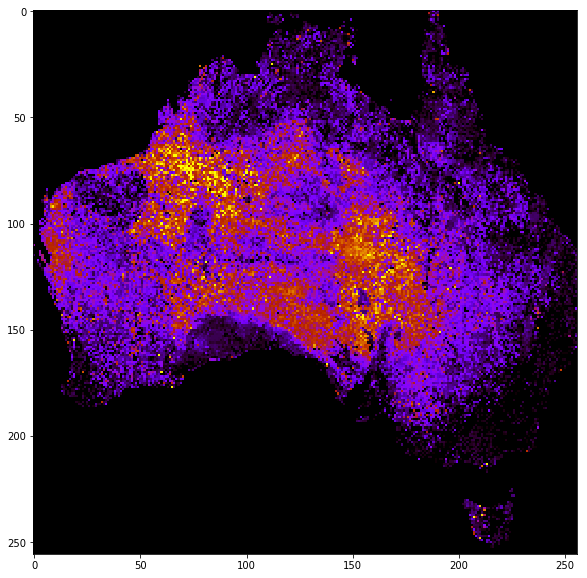

In [13]:
ds = gdal.Open(filename)
band = ds.GetRasterBand(1).ReadAsArray()

fig = plt.figure(figsize=(10,10))
plt.imshow(band, cmap='gnuplot',vmax=1.3, vmin=1)

**To request a coverage returned as in the NetCDF format, a similar GetCoverage request is constructed with the format parameter now specifying the NetCDF option.** 

In [14]:
output = wcs.getCoverage(identifier=layer, 
                         time=[wcs[layer].timepositions[0]],
                         bbox=subset_bbox,format='NetCDF',
                         crs='EPSG:4326', width=256, height=256)

In [15]:
print(output.geturl())

http://gsky.nci.org.au/ows/aster?version=1.0.0&request=GetCoverage&service=WCS&Coverage=Silica_Index&BBox=113%2C-44%2C153%2C-11&time=2012-06-01T00%3A00%3A00.000Z&crs=EPSG%3A4326&format=NetCDF&width=256&height=256


**Again, write the output to a file to save:**

In [16]:
filename = './gsky_wcs.nc'
with open(filename, 'wb') as f:
    f.write(output.read())

**To confirm or inspect the contents of the NetCDF file, libraries such as NetCDF4 Python can be used.** 

In [17]:
from netCDF4 import Dataset

odict_keys(['Band1', 'crs', 'lat', 'lon'])


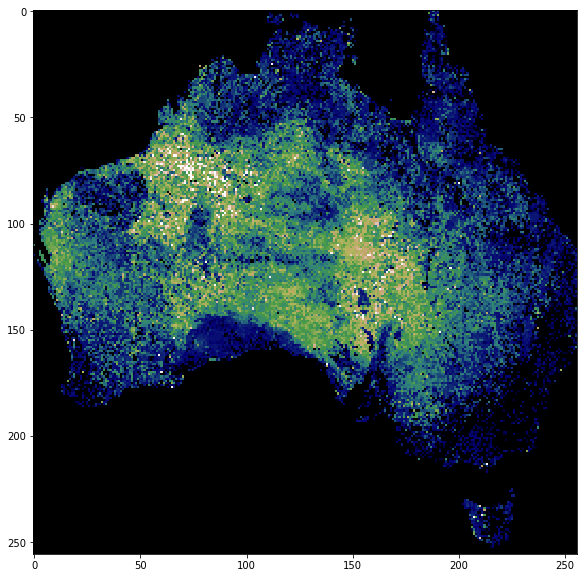

In [18]:
with Dataset(filename) as ds:
    print(ds.variables.keys())
    
    #band = ds['Band1']
    band = ds['Band1']

    fig = plt.figure(figsize=(10,10))
    plt.imshow(band[::-1],cmap='gist_earth',vmax=1.3, vmin=1)

<br>
<br>
<br>


--------
**For more information on the OGC WCS standard specifications and the Python OWSLib package:** <br/>
http://www.opengeospatial.org/standards/wcs <br/>

https://geopython.github.io/OWSLib/#wms <br/>
